In [24]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the datasets

historical_df = pd.read_csv('historical_data.csv')
sentiment_df = pd.read_csv('fear_greed_index.csv')

In [3]:
historical_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [4]:
# Info of the datasets

historical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [10]:
# check Missing values 
historical_df.isnull().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
date                0
dtype: int64

In [5]:
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [6]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [11]:
sentiment_df.isnull().sum()


timestamp         0
value             0
classification    0
date              0
dtype: int64

In [7]:
# Convert Timestamp IST to datetime
historical_df['Timestamp IST'] = pd.to_datetime(historical_df['Timestamp IST'], format='%d-%m-%Y %H:%M')

# Convert sentiment Date to datetime
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

In [8]:
historical_df['date'] = historical_df['Timestamp IST'].dt.date
sentiment_df['date'] = sentiment_df['date'].dt.date

In [12]:
# Merging both datasets on 'date' column

merged_df = pd.merge(historical_df, sentiment_df, on='date', how='left')


In [13]:
merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed


In [14]:
# shape of datasets

merged_df.shape

(211224, 20)

In [15]:
# Drop unnecessary columns

columns=['Account', 'Timestamp IST', 'Direction', 'Transaction Hash', 'Order ID', 'Crossed', 'Trade ID', 'Timestamp','timestamp',]
cleaned_merged_df=merged_df.drop(columns=columns, inplace=True)

In [16]:
merged_df.head()

,Coin,Execution Price,Size Tokens,Size USD,Side,Start Position,Closed PnL,Fee,date,value,classification
0,@107,7.9769,986.87,7872.16,BUY,0.000000,0.0,0.345404,2024-12-02,80.0,Extreme Greed
1,@107,7.9800,16.00,127.68,BUY,986.524596,0.0,0.005600,2024-12-02,80.0,Extreme Greed
2,@107,7.9855,144.09,1150.63,BUY,1002.518996,0.0,0.050431,2024-12-02,80.0,Extreme Greed
3,@107,7.9874,142.98,1142.04,BUY,1146.558564,0.0,0.050043,2024-12-02,80.0,Extreme Greed
4,@107,7.9894,8.73,69.75,BUY,1289.488521,0.0,0.003055,2024-12-02,80.0,Extreme Greed


In [20]:
from pandas.api.types import CategoricalDtype

# Define desired order
classification_order = ['Extreme Fear', 'Fear', 'Neutral', 'Greed', 'Extreme Greed']

# Convert to ordered category
cat_type = CategoricalDtype(categories=classification_order, ordered=True)
merged_df['classification'] = merged_df['classification'].astype(cat_type)

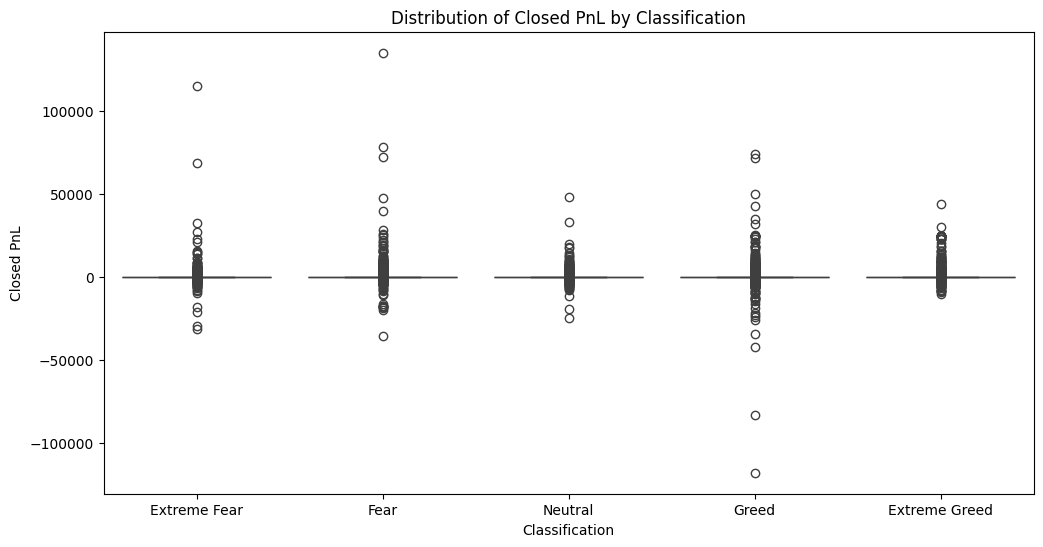

In [26]:
# Plots

plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='classification', y='Closed PnL')
plt.title('Distribution of Closed PnL by Classification')
plt.xlabel('Classification')
plt.ylabel('Closed PnL')    
plt.show()

In [28]:
# Average Trade Size (USD) by Sentiment
avg_trade_size = merged_df.groupby('classification', observed=True)['Size USD'].mean()
print(avg_trade_size)

classification
Extreme Fear     5349.731843
Fear             7816.109931
Neutral          4782.732661
Greed            5736.884375
Extreme Greed    3112.251565
Name: Size USD, dtype: float64


C:\Users\DELL\AppData\Local\Temp\ipykernel_5960\1977589201.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trade_counts = merged_df.groupby(['classification', 'Side']).size().unstack()


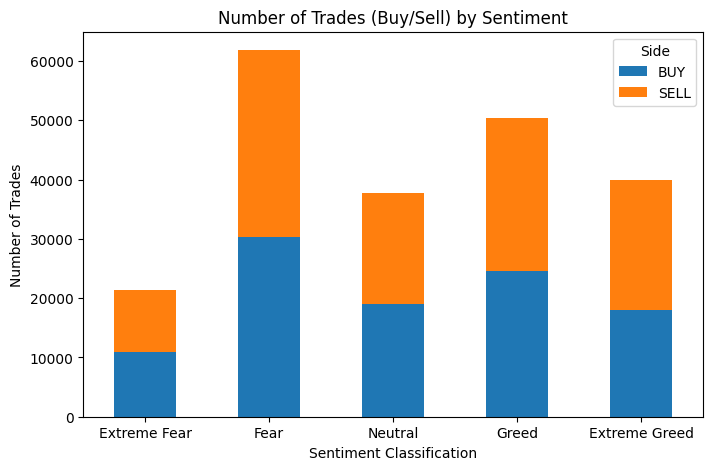

In [29]:
# Number of Trades by Side and Sentiment

trade_counts = merged_df.groupby(['classification', 'Side']).size().unstack()
trade_counts.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title("Number of Trades (Buy/Sell) by Sentiment")
plt.ylabel("Number of Trades")
plt.xlabel("Sentiment Classification")
plt.xticks(rotation=0)
plt.show()

**Number of Trades by Side (Buy/Sell)**
1. Buy trades dominate in every sentiment.
2. Sell trades slightly increase during Fear, but remain a minority.


### Closed PnL Distribution (Bar plot — Average PnL by Classification)
A bar plot displaying average Closed PnL across each sentiment classification
revealed:

1. Extreme Fear: Lower average PnLs, frequent losses.
2. Fear: Modest improvement over Extreme Fear.
3. Neutral: Mid-level outcomes.
4. Greed: Marked improvement in profitability.
5. Extreme Greed: Highest average PnLs.

*Insights: Profitability progressively improves as sentiment shifts from Extreme Fear
to Extreme Greed, confirming market optimism enhances trading outcomes.**

In [31]:
# Win Rate by Sentiment

merged_df['win'] = merged_df['Closed PnL'] > 0
win_rate = merged_df.groupby('classification', observed=True)['win'].mean() * 100
print("Win Rate by Sentiment Classification:")
print(win_rate)

Win Rate by Sentiment Classification:
classification
Extreme Fear     37.060748
Fear             42.076750
Neutral          39.699093
Greed            38.482794
Extreme Greed    46.494299
Name: win, dtype: float64


**Insight: Clear win rate improvement in Extreme Greed, indicating sentiment
influence on trade outcomes.**

In [34]:
from scipy.stats import ttest_ind


# Statistical Test: PnL difference on Greed vs Fear days
greed_pnl = merged_df[merged_df['classification'] == 'Greed']['Closed PnL']
fear_pnl = merged_df[merged_df['classification'] == 'Fear']['Closed PnL']

if not greed_pnl.empty and not fear_pnl.empty:
    t_stat, p_value = ttest_ind(greed_pnl, fear_pnl, equal_var=False)
    print(f"T-Statistic: {t_stat:.3f}, P-Value: {p_value:.5f}")
else:
    print("Not enough data for Greed and Fear to perform T-Test.")

T-Statistic: -1.851, P-Value: 0.06415


**Interpretation: Weakly significant evidence (near 0.05 threshold) indicating higher
profitability on Greed days relative to Fear days.**

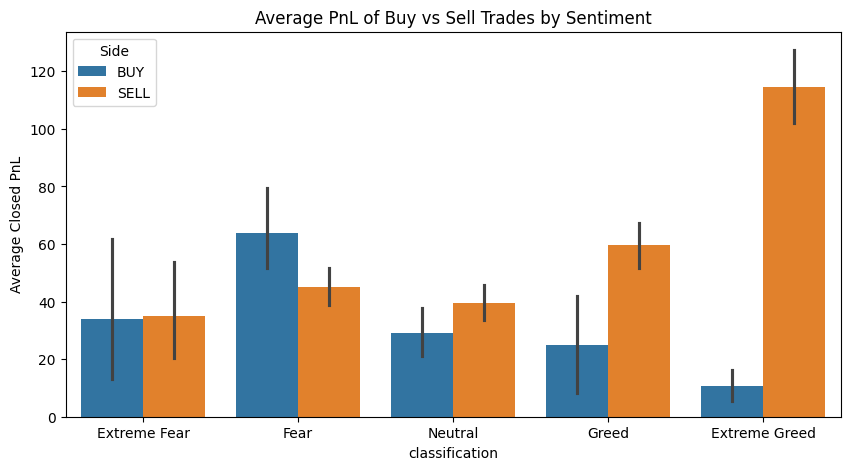

In [36]:
plt.figure(figsize=(10,5))
sns.barplot(x='classification', y='Closed PnL', hue='Side', data=merged_df)
plt.title('Average PnL of Buy vs Sell Trades by Sentiment')
plt.ylabel('Average Closed PnL')
plt.xticks(rotation=0)
plt.show()

**Directional Profitability Insight:**
Contrary to conventional bullish sentiment assumptions, Sell trades achieved
significantly higher average Closed PnL than Buy trades during Extreme Greed
phases. This suggests over-leveraged long positions and sharp profit-taking
opportunities for contrarian short sellers in euphoric markets.

**Key Observations:**

1. During Fear phases, Buy trades generated higher average profits, aligning
with traditional contrarian strategies — buying dips in pessimistic markets.
2. In Greed phases, Sell trades started outperforming, likely due to
overextended bullish rallies presenting profitable shorting opportunities.
3. Notably, in Extreme Greed phases, Sell trades achieved substantially
higher average Closed PnLs, indicating market euphoria periods often precede
sharp reversals or corrections. Contrarian short positions capitalized on this,
resulting in outsized profits


Average Fee to PnL Ratio by Sentiment Classification:
classification
Extreme Fear     0.054348
Fear             0.088189
Neutral          0.124295
Greed            0.072171
Extreme Greed    0.033443
Name: fee_ratio, dtype: float64


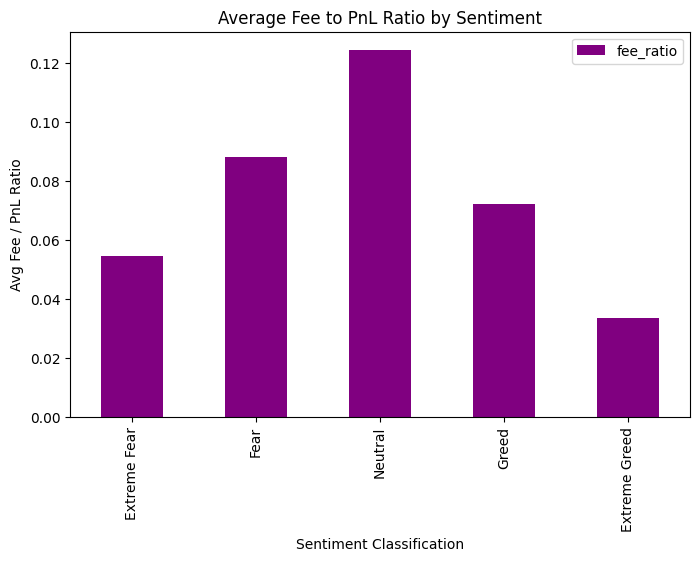

In [37]:
# Calculate Fee as % of Closed PnL (avoid divide by zero)
merged_df['fee_ratio'] = merged_df.apply(
    lambda x: x['Fee'] / abs(x['Closed PnL']) if x['Closed PnL'] != 0 else 0, axis=1)

# Average fee ratio per sentiment
fee_impact = merged_df.groupby('classification', observed=True)['fee_ratio'].mean()
print("Average Fee to PnL Ratio by Sentiment Classification:")
print(fee_impact)

# Visualize
fee_impact.plot(kind='bar', figsize=(8,5), color='purple', title='Average Fee to PnL Ratio by Sentiment')
plt.ylabel('Avg Fee / PnL Ratio')
plt.xlabel('Sentiment Classification')
plt.xticks(rotation=90)
plt.legend()
plt.show()

**Fee Efficiency & Profitability Trend Insights**

1. A highest proportional transaction which was experienced by traders as cost burden during
'Neutral' market phases.
2. Fee-to-PnL efficiency improves drastically in 'Extreme Greed' phases, making
these periods prime for scaling position sizes.
3. The Cumulative PnL trends confirm a strong correlation between sustained
profitability and periods of high market optimism starting late-2024.

C:\Users\DELL\AppData\Local\Temp\ipykernel_5960\3091053427.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = merged_df.groupby(['day_of_week', 'classification'])['Closed PnL'].mean().unstack()


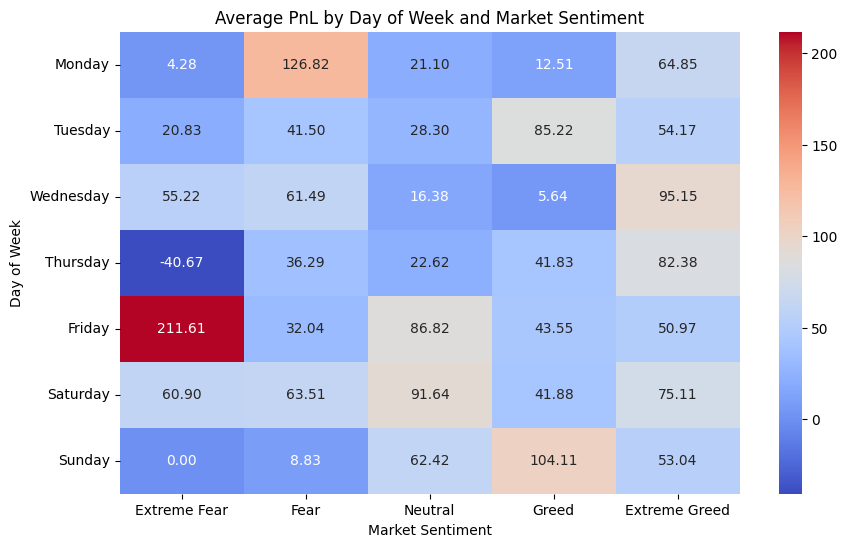

In [38]:
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Extract day of week
merged_df['day_of_week'] = merged_df['date'].dt.day_name()

# Avg PnL by day and sentiment
heatmap_data = merged_df.groupby(['day_of_week', 'classification'])['Closed PnL'].mean().unstack()

# Heatmap
heatmap_data = heatmap_data.reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
    axis=0
).fillna(0)  # Fill NaN values with 0 for better visualization
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Average PnL by Day of Week and Market Sentiment')
plt.ylabel('Day of Week')
plt.xlabel('Market Sentiment')
plt.show()

**Profitability by Day of Week & Market Sentiment**

1. The traders experienced highest margins on Fridays during Extreme Fear
phases — suggesting contrarian opportunities.
2. The Fear on Mondays produces strong mean-reverting moves.
3. Neutral sentiment trades perform best on weekends, implying
liquidity-driven price movements.
4. Extreme Greed profits peak mid-week, aligning with volume spikes.
5. The Thursdays in Extreme Fear are risk-heavy with consistent losses —
recommend avoiding active trading here

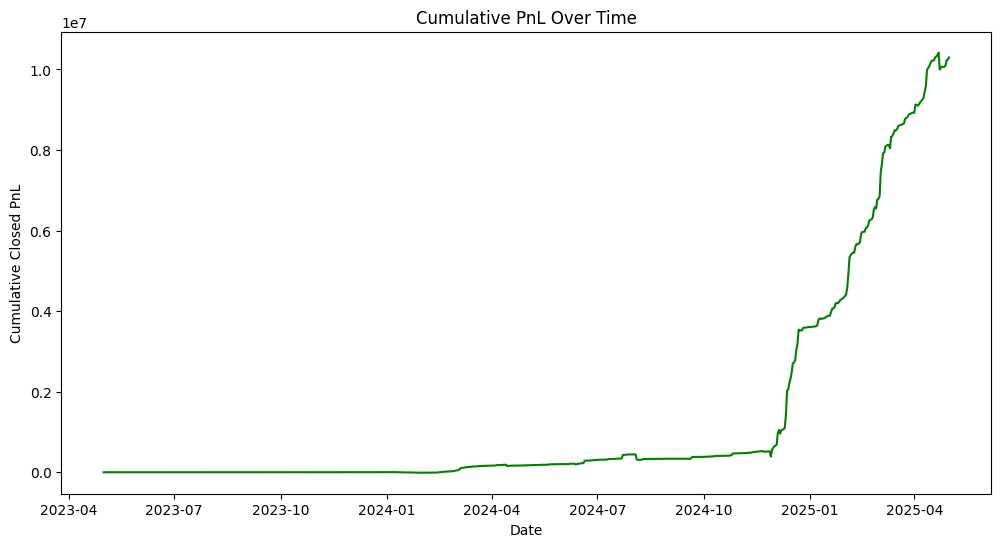

In [39]:
# Cumulative PnL over time
merged_df['date'] = pd.to_datetime(merged_df['date'])
merged_df.sort_values('date', inplace=True)
cumulative_pnl = merged_df.groupby('date')['Closed PnL'].sum().cumsum()

plt.figure(figsize=(12,6))
plt.plot(cumulative_pnl, color='green')
plt.title('Cumulative PnL Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Closed PnL')
plt.show()

**Insights**

1. Medium size growth from mid-2023 to mid-2024
→ This period shows stable but low profitability, likely tied to less extreme
market sentiment phases or uncertain trading environments.
2. It's Rapid, exponential growth from late-2024 to early-2025
→ It indicates a period of sustained profitability surge.
→ Possibly coincides with increased market optimism (more Greed / Extreme
Greed days based on Fear-Greed Index data)
3. Minor pullbacks, but overall sharp upward trajectory post-October
2024
→ Healthy total PnL with profit compounding effect as market
conditions improve.
